### Here I am using 2 degree regression to see the changes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Advertising_raw.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Simple Lin Reg

Only using the TV data in 2 degree

Text(0, 0.5, 'Sales')

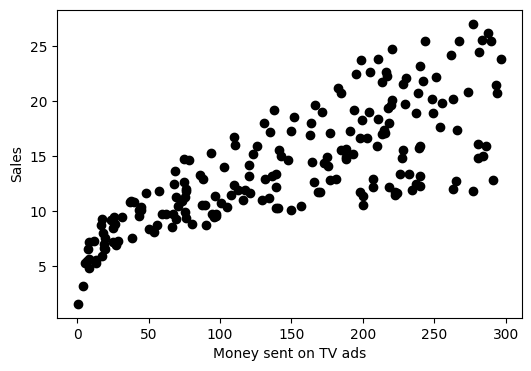

In [12]:
plt.figure(figsize=(6,4))
plt.scatter(data.TV, data.sales, c='k')
plt.xlabel("Money sent on TV ads")
plt.ylabel('Sales')

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

model = LinearRegression()
poly = PolynomialFeatures(degree=2)

In [11]:
TV_poly = poly.fit_transform(data.TV.values.reshape(-1,1))
y = data.sales

In [31]:
%%time
model.fit(TV_poly, y)
print(model.intercept_, model.coef_)
pred = model.predict(TV_poly)
mean_squared_error(pred, data.sales)

5.4201065481424 [ 0.00000000e+00  9.64341770e-02 -3.15222433e-04  5.57199796e-07]
CPU times: total: 0 ns
Wall time: 3.61 ms


10.238365552094635

In [28]:
TV_poly[:5]

array([[1.00000000e+00, 2.30100000e+02, 5.29460100e+04, 1.21828769e+07],
       [1.00000000e+00, 4.45000000e+01, 1.98025000e+03, 8.81211250e+04],
       [1.00000000e+00, 1.72000000e+01, 2.95840000e+02, 5.08844800e+03],
       [1.00000000e+00, 1.51500000e+02, 2.29522500e+04, 3.47726588e+06],
       [1.00000000e+00, 1.80800000e+02, 3.26886400e+04, 5.91010611e+06]])

Text(0, 0.5, 'Sales')

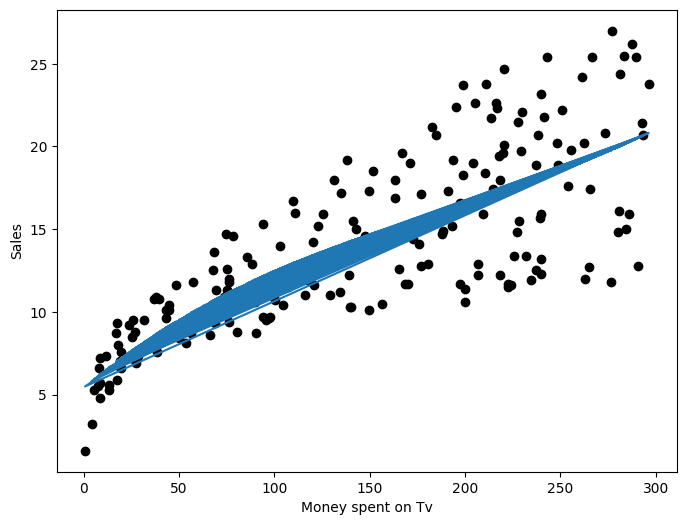

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(data.TV, y, c='k')
plt.plot(data.TV, pred)
plt.xlabel("Money spent on Tv")
plt.ylabel("Sales")

In [30]:
poly = PolynomialFeatures(degree= 3)
TV_poly = poly.fit_transform(data.TV.values.reshape(-1,1))
y = data.sales

In [32]:
%%time
model.fit(TV_poly, y)
print(model.intercept_, model.coef_)
pred = model.predict(TV_poly)
mean_squared_error(pred, y)

5.4201065481424 [ 0.00000000e+00  9.64341770e-02 -3.15222433e-04  5.57199796e-07]
CPU times: total: 0 ns
Wall time: 1.97 ms


10.238365552094635

### Multiple Linear Regression

In [36]:
x = data.drop(['sales'], axis=1)
y = data.sales

In [37]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

In [39]:
model.fit(x_poly, y)
print(model.intercept_, model.coef_)
pred = model.predict(x_poly)
mean_squared_error(pred, y)

5.316307835966869 [ 0.00000000e+00 -2.69092066e-03  5.11911869e-02  2.21312303e-02
  2.17151363e-03  2.51855190e-06  6.92052232e-06 -5.86288117e-06
  4.21682861e-05 -1.10306878e-04  1.10254228e-03 -4.85560772e-05
  1.23433080e-04  8.07146167e-05  2.26993581e-05]


0.36197649368353124

Using 3 degree polynomial

In [41]:
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)

model.fit(x_poly, y)
print(model.intercept_, model.coef_)
pred = model.predict(x_poly)
mean_squared_error(pred, y)

9096992.24932855 [-9.09698848e+06  1.11925652e-02  8.54831533e-02  6.13013612e-02
  2.32413306e-03 -1.45563220e-04  7.65861473e-05 -4.61671716e-04
  6.45916257e-05 -4.30547593e-04  1.36770159e-03 -1.58081463e-04
 -7.63771673e-04 -4.48632788e-04  3.22279876e-04  4.41258990e-07
 -2.77252211e-07 -1.52117396e-06  1.97460559e-06  1.56109728e-08
 -8.98594697e-07 -6.11557624e-07  2.63349361e-05 -1.36550259e-05
  2.56364063e-07  7.89229765e-07 -2.84050446e-06  7.87510728e-07
  1.45622449e-05 -3.24876961e-06  2.99687285e-07 -3.12539774e-05
 -9.81025784e-06  3.63318690e-05 -1.05950352e-05]


0.49081424897188797

here using 3 degree is even worse than using 2 degree